# Road Safety Forecasting: Predictive Modeling of Accident Severity in Addis Ababa


## Report Overview.
1. Business Understanding
2. Data Understanding
3. Data Cleaning and Formating
4. EDA
5. Modelling
6. Regression Results
7. Model Refinement and Evaluation
8. Summary.
9. Recommendations.

## 1. Business Understanding.

### a. Introduction.

In a metroplitan setting, road accidents cast a far-reaching impact on both individuals and the urban fabric. As cities evolve with complex road networks and diverse transportation modes, the urgency to address road safety intensifies. Crucially, accurate classification of accident severity—spanning 'Slight Injury', 'Serious Injury', and 'Fatal Injury'—is pivotal. This classification empowers urban planners, law enforcement, emergency responders, and policymakers to strategically allocate resources, enhance safety measures, and optimize emergency responses. Through data-driven insights and predictive modeling, our project aims to contribute to a safer urban landscape, where road safety remains an integral component of urban evolution.

For our project we will assume that we have two clients:
1. Addis Ababa urban planing institute
2. Addis Ababa emergency services
3. Addis Ababa Road Safety Authority

### b. Problem Statement.
Addis Ababa is a dynamic urban landscape , ensuring public safety and efficient resource allocation stands as a paramount concern. The classification of road traffic accidents into distinct categories of 'Slight Injury', 'Serious Injury', and 'Fatal Injury' holds immense potential to empower key stakeholders with actionable insights, facilitating informed decision-making and targeted interventions.

1. The Addis Ababa Urban Planning Institute, responsible for shaping the city's infrastructure and spatial design, grapples with the challenge of optimizing urban spaces to enhance safety. Accurate accident severity classification equips the Institute with a data-driven framework to identify high-risk zones, influencing road design, traffic flow management, and the implementation of safety measures.

2. Emergency services in Addis Ababa are entrusted with rapid response to accidents, demanding precise resource allocation. The ability to swiftly gauge the severity of accidents through classification provides emergency responders with a crucial edge, enabling them to deploy appropriate resources and medical personnel promptly, potentially saving lives and minimizing the impact of accidents.

3. The Addis Ababa Road Safety Authority shoulders the responsibility of devising strategies to reduce road accidents and their consequences. The accurate classification of accident severity offers the Authority a powerful tool to assess the efficacy of safety measures, formulate targeted awareness campaigns, and enact policies that align with the distinct needs of 'Slight', 'Serious', and 'Fatal' accident scenarios.


### c. Objectives.

Based on the our problem statement, here are the five objectives for the project:

1. **Create Accurate Classification Model:** Develop a robust predictive model using multi-class classification to accurately categorize road accidents as 'Slight', 'Serious', or 'Fatal'.

2. **Enhance Model Precision:** Rigorously evaluate and refine the model's accuracy through comprehensive testing and data-driven adjustments.

3. **Inform Urban Planning Decisions:** Provide actionable insights to the Urban Planning Institute for identifying high-risk zones, improving safety measures, and aligning urban development strategies.

4. **Optimize Emergency Response:** Empower emergency services with rapid, accurate severity assessments to optimize resource allocation and response effectiveness.

5. **Shape Road Safety Initiatives:** Assist the Road Safety Authority in evaluating measures, crafting targeted awareness campaigns, and formulating policies tailored to different accident scenarios.

6. **Promote Safer Urban Environment:** Contribute to safer roads and an enhanced urban environment by minimizing accident impact and optimizing resource allocation for a secure Addis Ababa.

### d. Metrics Used For Project Success Evaluation.
Based on the objectives of the project, the following metrics can be considered for evaluating the success of the project:

1. **Severity Classification Accuracy:** Assess the overall correctness of our model's severity predictions across all categories.

2. **Severity Precision, Recall, and F1-Score:** Evaluate the precision, recall, and F1-score for each severity category to gauge the accuracy of our predictions for different accident levels.

3. **Severity Differentiation (AUC-ROC):** measure our model's ability to distinguish between severity classes, especially for binary scenarios like 'Slight' vs. 'serious' and Fatal.


4. **Severity Prediction Error (MAE or RMSE):** If our model predicts numeric values (e.g., severity scores), we will quantify the average difference between our predictions and actual values.

5. **Confusion Matrix:** Construct a confusion matrix to visualize the number of correct and incorrect predictions for each severity category. This matrix helps in understanding the model's strengths and weaknesses.

These metrics collectively offer a comprehensive assessment of our project's predictive model, focusing on accuracy, precision, recall, differentiation, and robustness to imbalanced data.

## 2. Data Assembly And Preparation

In [1]:
# importing the necessary libraries...arranged in order by name
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import chi2_contingency, skew, boxcox, f_oneway
from statistics import mode
from sklearn.preprocessing import LabelEncoder, StandardScaler , OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LinearRegression

In [2]:
##define useful constants that will be used throughout the project to avoid redundancy :

# settings  for all plots and visualizations
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", palette="pastel", rc=custom_params)

In [3]:
##Load Dataset.
df=pd.read_csv('data.csv')
#prints the first three rows
df.head(3).T

,0,1,2
Time,17:02:00,17:02:00,17:02:00
Day_of_week,Monday,Monday,Monday
Age_band_of_driver,18-30,31-50,18-30
Sex_of_driver,Male,Male,Male
Educational_level,Above high school,Junior high school,Junior high school
Vehicle_driver_relation,Employee,Employee,Employee
Driving_experience,1-2yr,Above 10yr,1-2yr
Type_of_vehicle,Automobile,Public (> 45 seats),Lorry (41?100Q)
Owner_of_vehicle,Owner,Owner,Owner
Service_year_of_vehicle,Above 10yr,5-10yrs,NaN


## 3 Data Understanding


Data understanding is a critical step in any data analysis or modeling process. It involves getting familiar with the dataset, its features, and its characteristics. Based on the dataset used, here's a data understanding summary:

<a href="https://www.kaggle.com/datasets/saurabhshahane/road-traffic-accidents">Kaggle Page</a>

**Dataset Overview:**
- Source: Addis Ababa Sub city police department records
- Time Period: Year 2017-2020
- Number of Instances (Rows): 12316
- Number of Features (Columns): 32

**Features:** (with data type in brackets)
1. 'Time': The time of the accident occurrence. (ordinal)
2. 'Day_of_week': The day of the week when the accident occurred. (norminal)
3. 'Age_band_of_driver': Age group of the driver involved in the accident. (ordinal)
4. 'Sex_of_driver': Gender of the driver. (norminal)
5. 'Educational_level': Educational level of the driver. (ordinal)
6. 'Vehicle_driver_relation': Relationship between the driver and the vehicle. (norminal)
7. 'Driving_experience': Experience level of the driver. (ordinal)
8. 'Type_of_vehicle': Type of vehicle involved in the accident. (norminal)
9. 'Owner_of_vehicle': Owner of the vehicle. (norminal)
10. 'Service_year_of_vehicle': Years of service of the vehicle. (ordinal)
11. 'Defect_of_vehicle': Defect of the vehicle that might have contributed to the accident. (norminal)
12. 'Area_accident_occured': Area where the accident occurred. (norminal)
13. 'Lanes_or_Medians': Information about lanes or medians. (norminal)
14. 'Road_allignment': Alignment of the road. (norminal)
15. 'Types_of_Junction': Type of road junction where the accident occurred. (norminal)
16. 'Road_surface_type': Type of road surface. (norminal)
17. 'Road_surface_conditions': Conditions of the road surface during the accident. (norminal)
18. 'Light_conditions': Lighting conditions during the accident. (ordinal)
19. 'Weather_conditions': Weather conditions during the accident. (norminal)
20. 'Type_of_collision': Type of collision that occurred. (norminal)
21. 'Number_of_vehicles_involved': Number of vehicles involved in the accident. (discrete)
22. 'Number_of_casualties': Number of casualties in the accident. (discrete)
23. 'Vehicle_movement': Movement of the vehicle at the time of the accident. (norminal)
24. 'Casualty_class': Class of the casualty (e.g., driver, passenger, pedestrian). (norminal)
25. 'Sex_of_casualty': Gender of the casualty. (norminal)
26. 'Age_band_of_casualty': Age group of the casualty. (ordinal)
27. 'Casualty_severity': Severity level of the casualty. (ordinal)
28. 'Work_of_casuality': Occupation or work status of the casualty. (norminal)
29. 'Fitness_of_casuality': Fitness status of the casualty. (norminal)
30. 'Pedestrian_movement': Movement of pedestrians involved in the accident. (norminal)
31. 'Cause_of_accident': Probable cause of the accident. (norminal)
32. 'Accident_severity': Severity level of the accident. (ordinal) ~ Target

In [4]:
def get_more_info(dataframe):
    """
    An upgrade on the default df.info()
    
    Parameters:
    dataframe (pandas.DataFrame): The DataFrame containing the data.

    Returns:
    str: prints out the column name, its data type, the number of missing values its has
    , the number of unique values it has, and the unique values.
    """
    function_df = dataframe.copy() # create a copy of dataframe
    for col in function_df.columns:
        print("------------------------------------------------------------------")
        missing_percentage = round(function_df[col].isna().sum() * 100 / len(function_df), 2) # round to 2dp
        print("Column name: ", col)
        print("Dtype: ", function_df[col].dtype) # get data type
        print("Missing values (%): ", missing_percentage)
        print("# Unique values: ", function_df[col].nunique()) # get number of unique values
        print("Unique values: ", function_df[col].unique()) # get a list of the unique values
        print("------------------------------------------------------------------")
get_more_info(df)

------------------------------------------------------------------
Column name:  Time
Dtype:  object
Missing values (%):  0.0
# Unique values:  1074
Unique values:  ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
------------------------------------------------------------------
------------------------------------------------------------------
Column name:  Day_of_week
Dtype:  object
Missing values (%):  0.0
# Unique values:  7
Unique values:  ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
------------------------------------------------------------------
------------------------------------------------------------------
Column name:  Age_band_of_driver
Dtype:  object
Missing values (%):  0.0
# Unique values:  5
Unique values:  ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
------------------------------------------------------------------
------------------------------------------------------------------
Column name:  Sex_of_driver
Dty

## 4 Data Cleaning and Formatting

### Handling missing values

In [5]:
#check for missing values
# Treat "na", "Unknown", "Unknown or other", and "unknown" as Null
df.replace(["na", "Unknown", "unknown", "Unknown or other"], np.nan, inplace=True)
missing = df.isnull().sum() # add up all missing values per column
missing_value_df = pd.DataFrame(index= missing.index, data={
                                 'total_missing': missing.values})
missing_value_df.sort_values('total_missing', ascending=True, inplace=True)
missing_value_df
## output: 16 columns have NaN values(missing)

,total_missing
Time,0
Number_of_casualties,0
Number_of_vehicles_involved,0
Light_conditions,0
Road_surface_conditions,0
Accident_severity,0
Day_of_week,0
Cause_of_accident,25
Road_allignment,142
Type_of_collision,169


#### Solution :

**The strategy used to fix missing values was dropping columns that have more than 1000 values as Null.**

These are:
- Types_of_Junction
- Age_band_of_driver
- Fitness_of_casuality 
- Work_of_casuality 
- Defect_of_vehicle 
- Casualty_class 
- Sex_of_casualty 
- Age_band_of_casualty 
- Casualty_severity 
- Service_year_of_vehicle 

In [6]:
#Dropping columns and rows with null values as explained above:
threshold = 1000 
#Drop columns with more than the threshold number of null values
df = df.dropna(axis=1, thresh=df.shape[0] - threshold + 1)
#this drops 10 columns.

#now we drop all rows with missing data (NaN)
df=df.dropna()
# prints columns and rows of our subset
df.shape

(8337, 22)

### Handling duplicates

In [7]:
# check for duplicated
df.duplicated().sum()

1

In [8]:
# drop duplicated column
df.drop_duplicates(inplace=True)

### Formatting the "Time" column
In this section, we'll be extracting the hour from the 'Time' column because it allows me to create a new feature that<br> captures important information without introducing additional noise. By simplifying the representation of the data, I aim to reduce<br> the variance of the column and make it more usable for downstream tasks such as machine learning models

In [9]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour # extract hour from time
df.drop(columns="Time", inplace=True) # Time column will no longer be needed

C:\Users\JACINTA\AppData\Local\Temp\ipykernel_29208\2887776418.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


## 5 EDA
Exploratory Data Analysis (EDA) plays a crucial role in understanding our data before diving deeper into model development and evaluation.<br>
Conducting both Bivariate and Univariate analysis provides valuable insights into the relationships between variables and their association<br>
with the outcome variable, Accident Severity.

Bivariate analysis focuses on examining the relationship between two variables at a time. We use Anova and Chi Squared<br>
tests to explore the significance of these associations and identify any potential outliers or anomalies.<br> 
These methods allow us to gain a comprehensive view of the data and detect any patterns or trends that might impact our results.

Univariate analysis concentrates on evaluating the distribution of each feature individually. This includes assessing measures<br>
of central tendency such as mean, median, and mode. Understanding the distribution of each feature is essential for determining<br>
whether the data is normally distributed or skewed, which can affect the choice of appropriate statistical models for subsequent analyses.<br>
Given that majority of our feature variables, as well as the target variable, are categorical will mainly be focussed on observing class imbalances<br>
within the datatation of the results.

Overall, combining both types of EDA techniques enables us to build a solid foundation for further analysis and ensure that our findings are well-grounded and accurate.

### Findings
The following are the key findings from the EDA:

- We have a major class imbalance in our targe variable (Accident severity).
- The majority of features are also imbalanced. - They **may** not contribute much to our final model
- We've used statistical test (ANOVA & Chi) to see whether their exists an  association between the features and the target variable.<br> 
We've observed that majority of our feature have a high p-value. Suggesting that there isn't a statistically significant difference between<br>
the means or distributions of the feature acreoss different levels of the target variable. While this alone doesn't imply<br>
that these features won't contribute much to the final model, it does help us narrow down on the most influential features

### Univariate analysis

Necessary function for univariate analysis

In [10]:
# for categorical columns
def plot_class_distribution(column, df):
    """
    Create a bar graph to show the distribution of classes within a column.

    Parameters:
    column (str): Name of the column in the DataFrame.
    df (pd.DataFrame): The DataFrame containing the data.
    """
    # Get value counts and calculate percentages
    value_counts = df[column].value_counts()
    total_count = value_counts.sum()
    percentages = (value_counts / total_count) * 100

    # Create bar plot using Seaborn
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=percentages.index, y=percentages.values)

    # Add percentages on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}%', ha="center")

    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.title(f'Distribution of {column} Classes')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
# for numeric (discrete) columns
def plot_discrete_numeric_distribution(column, df):
    """
    Create a histogram to visualize the distribution of a discrete numeric column.

    Parameters:
    column (str): Name of the column in the DataFrame.
    df (pd.DataFrame): The DataFrame containing the data.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins='auto', edgecolor='black', alpha=0.7)
    
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

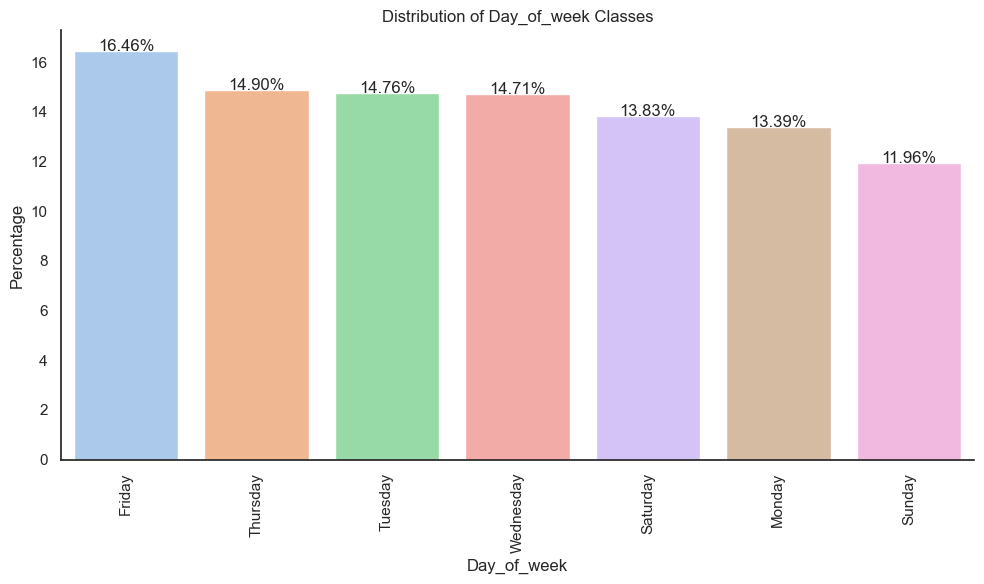

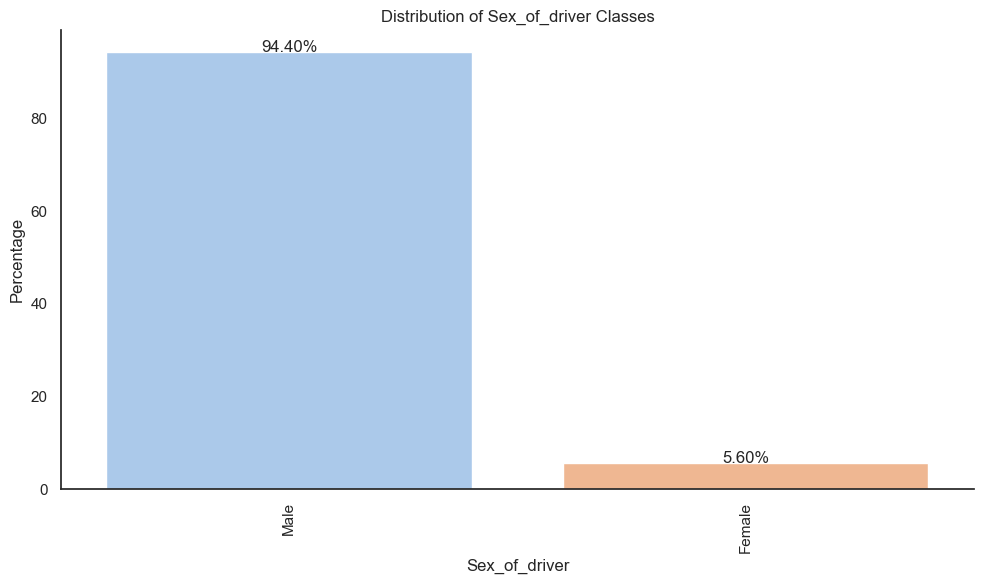

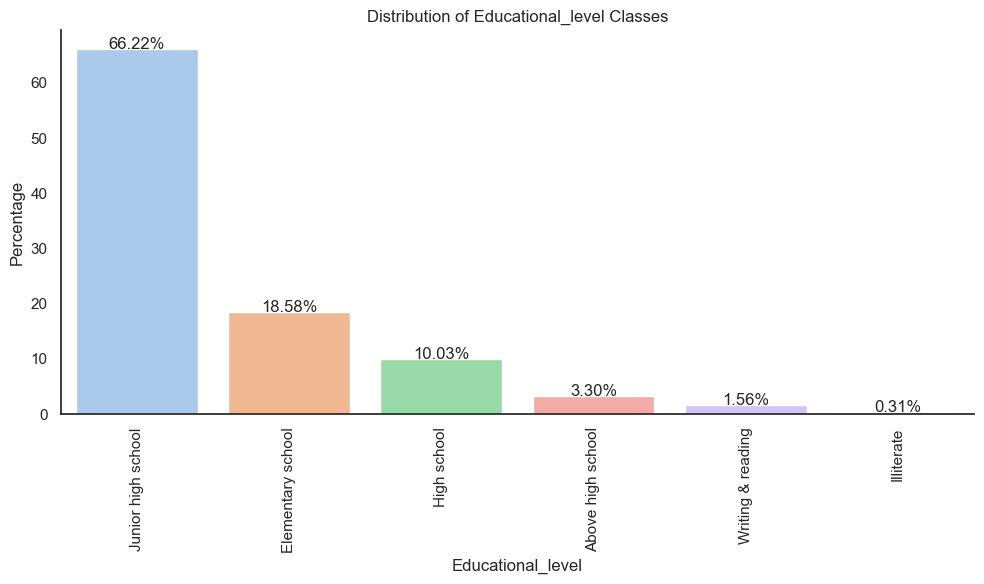

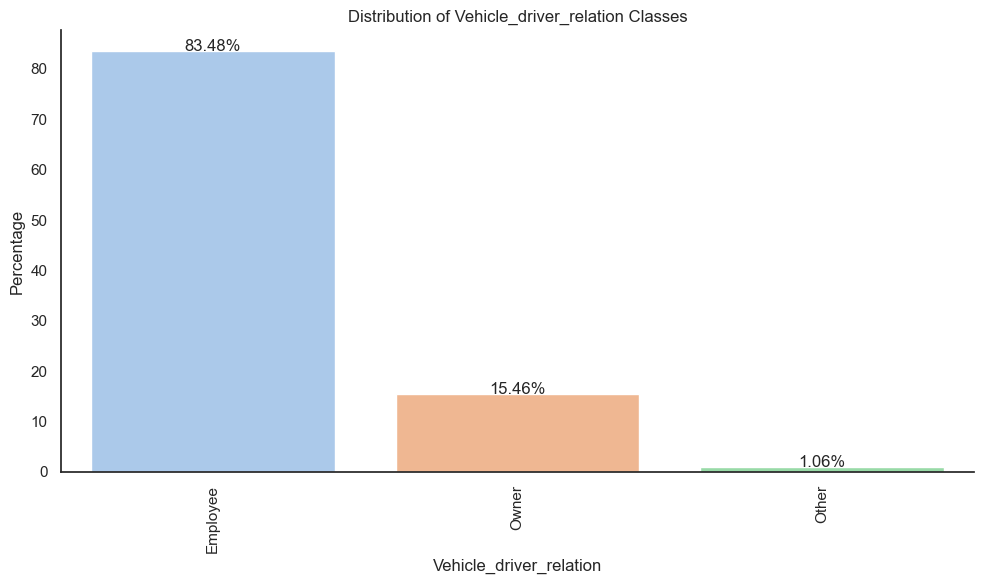

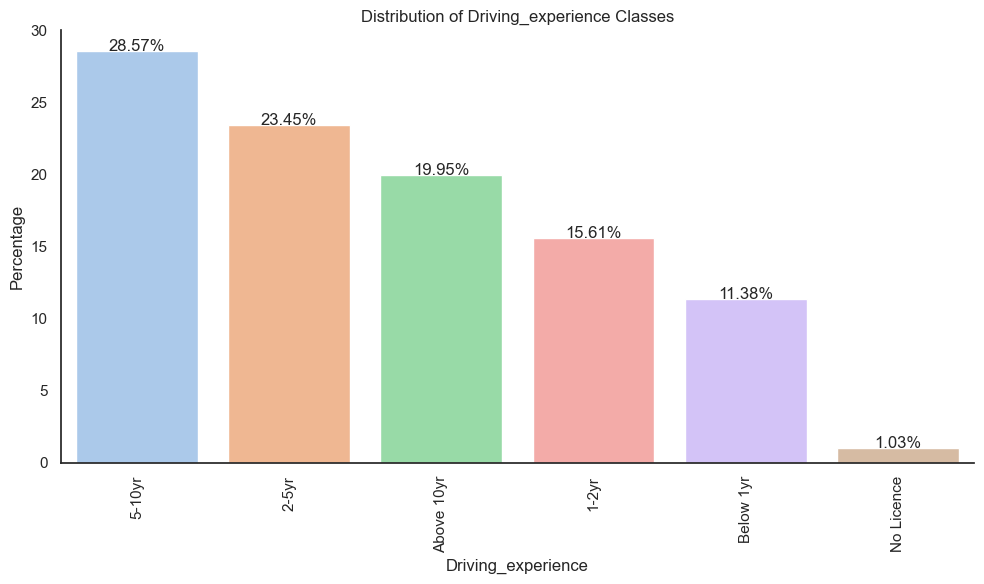

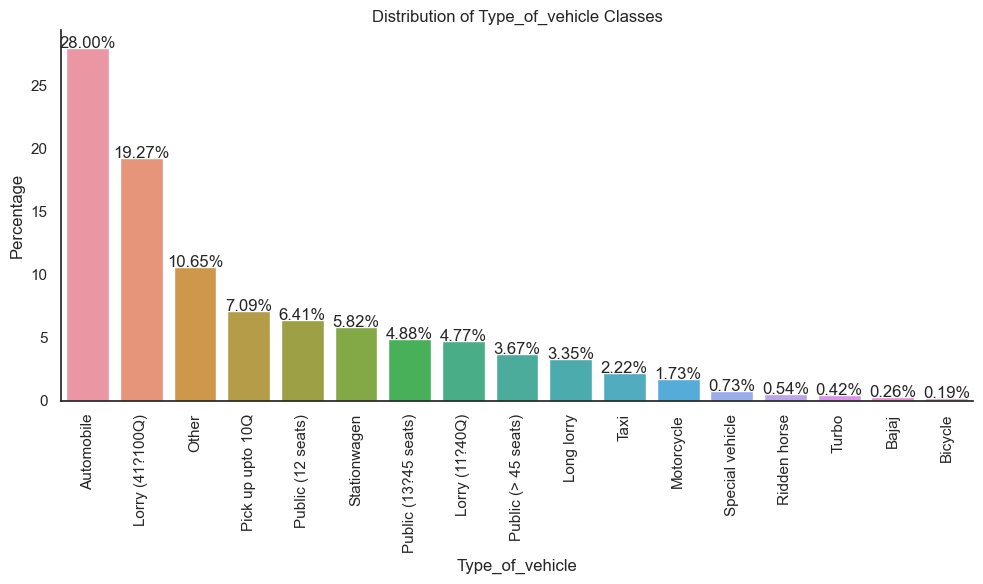

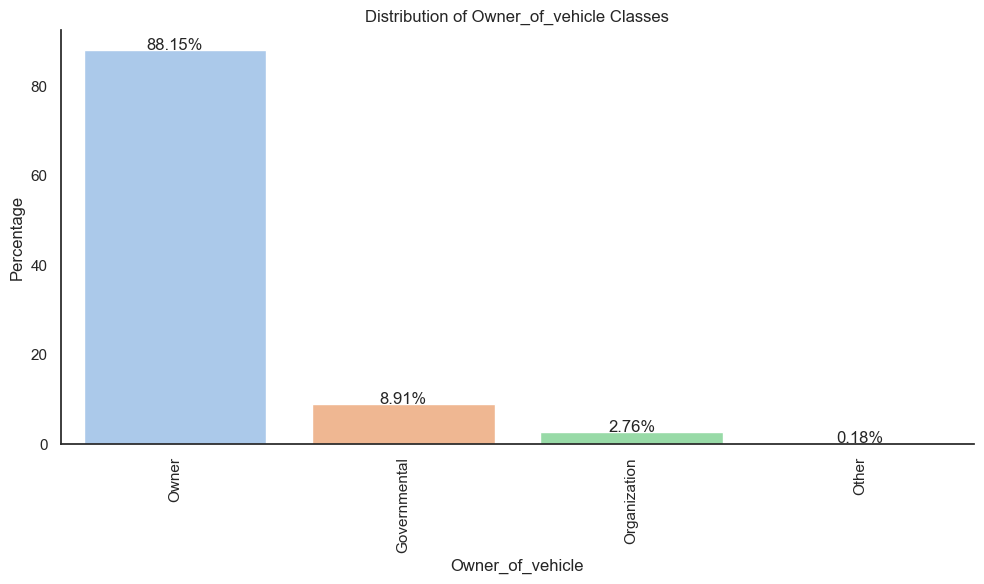

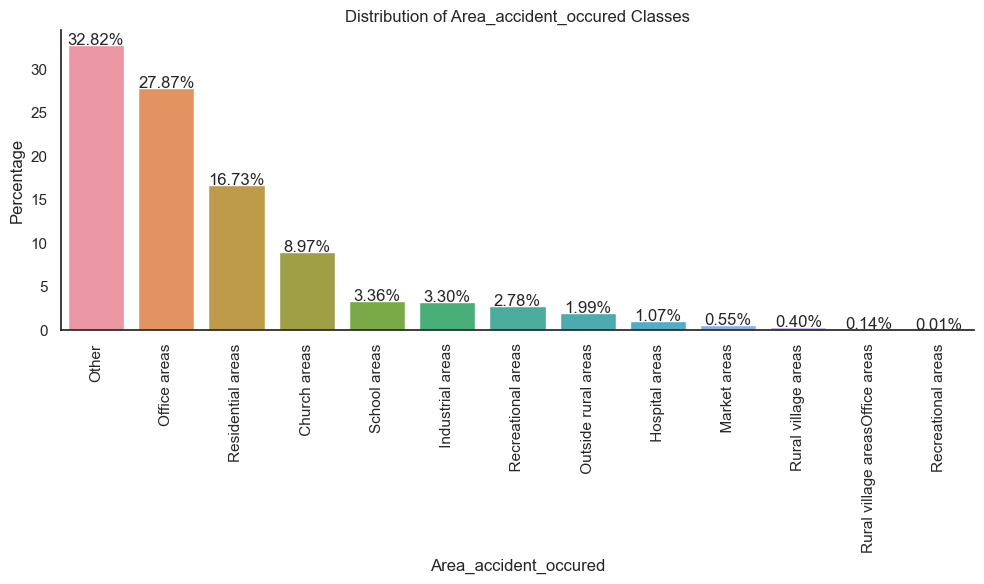

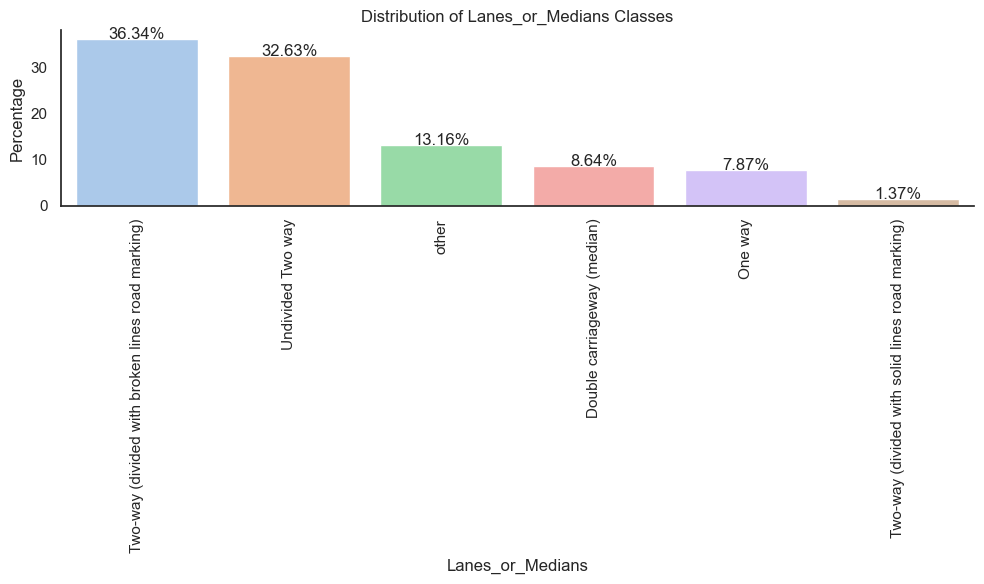

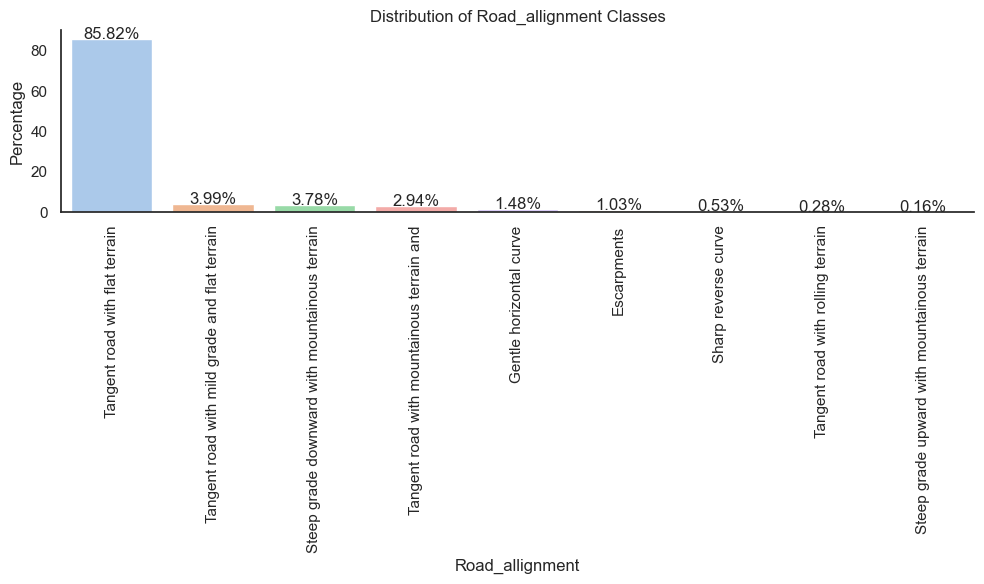

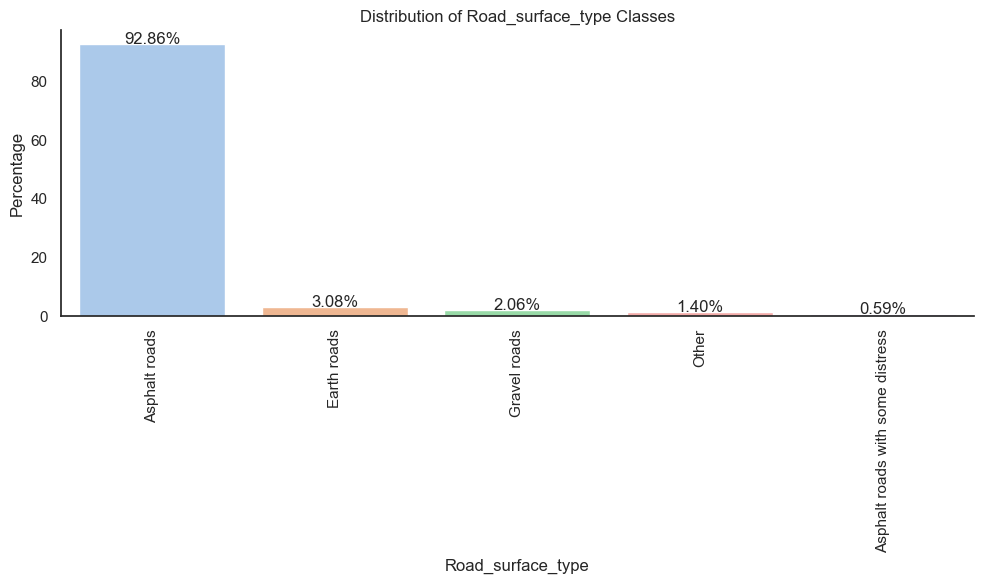

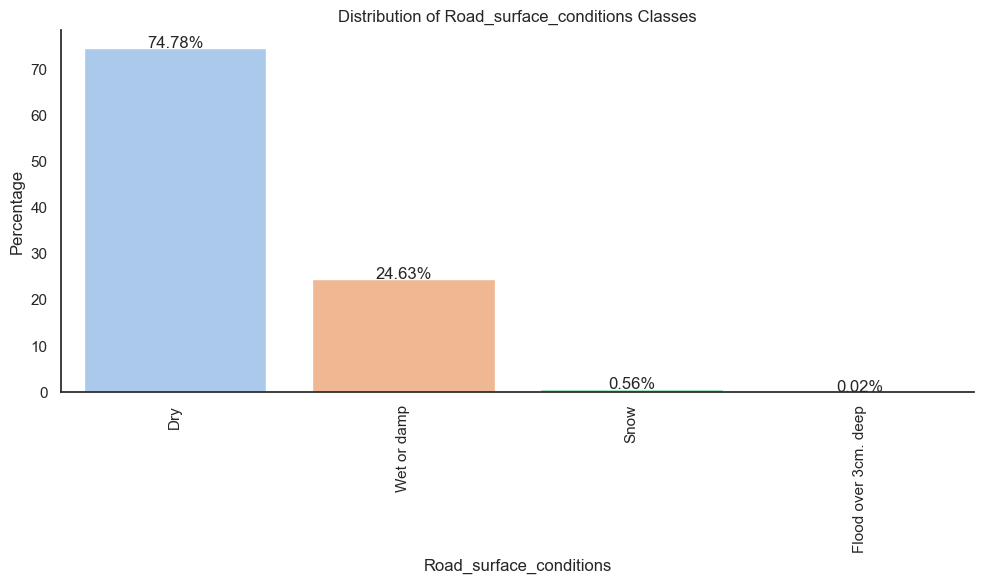

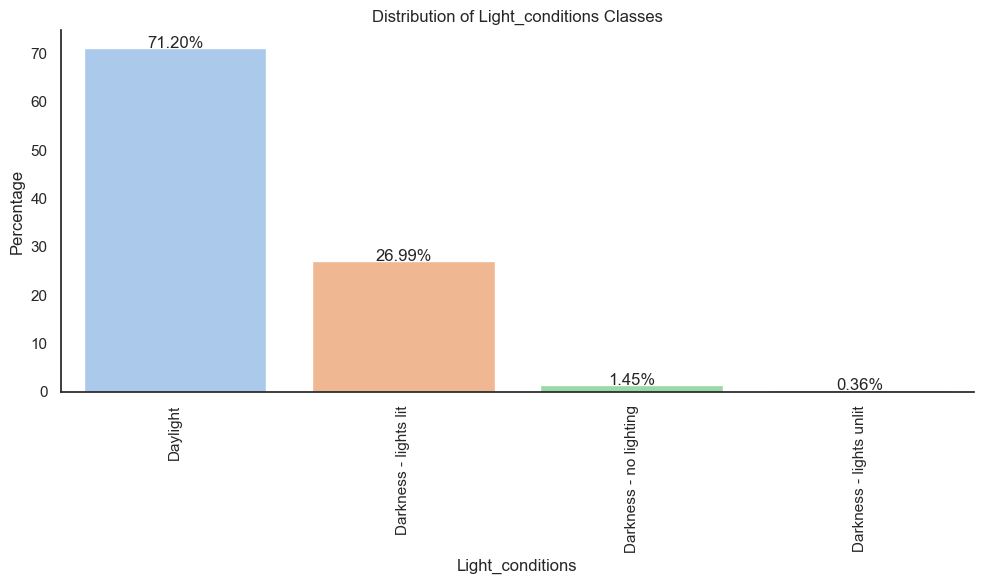

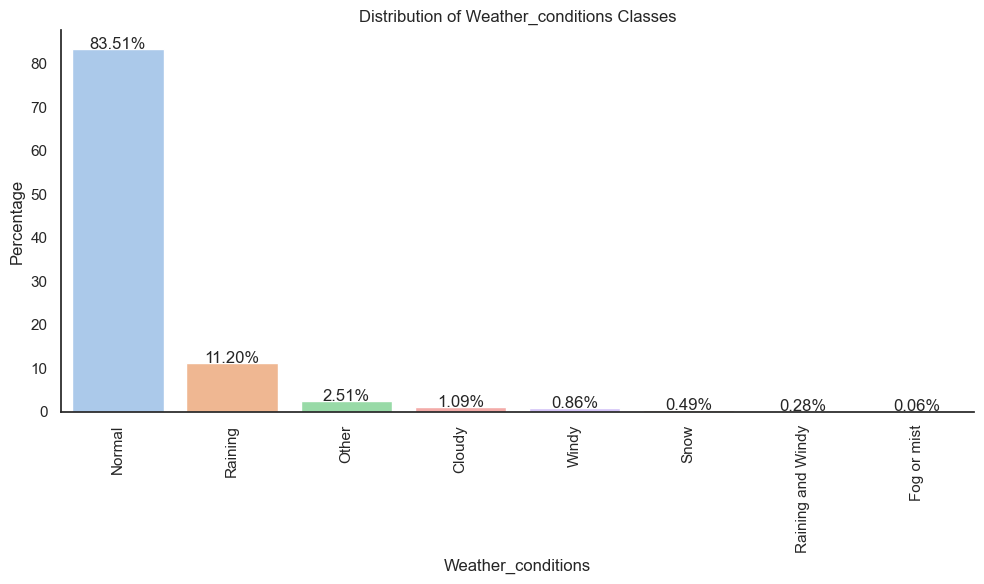

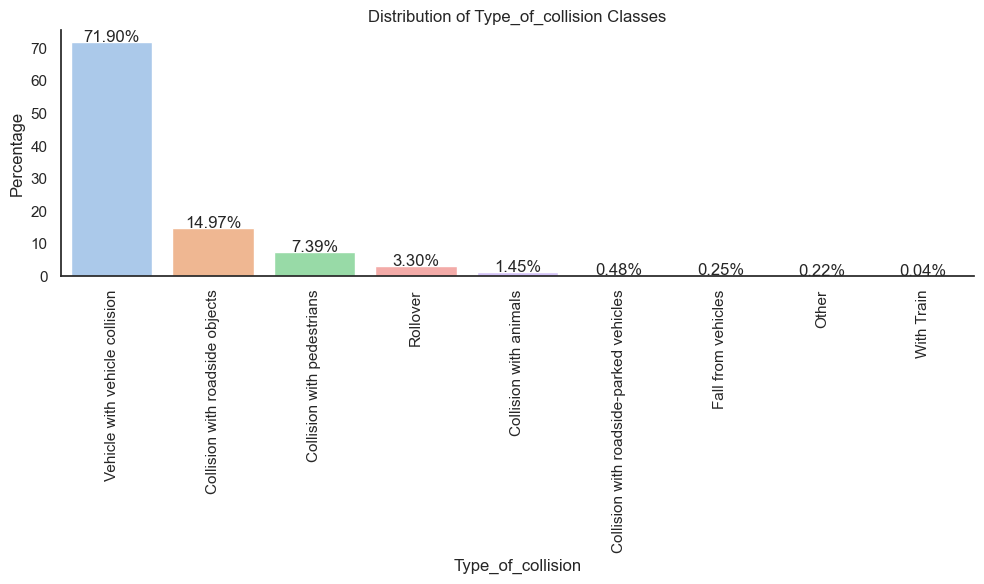

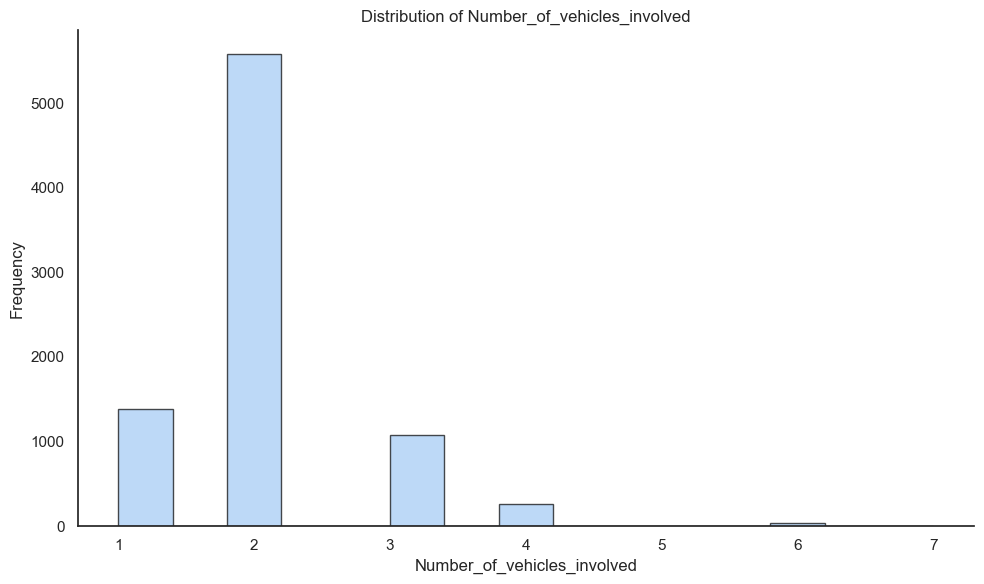

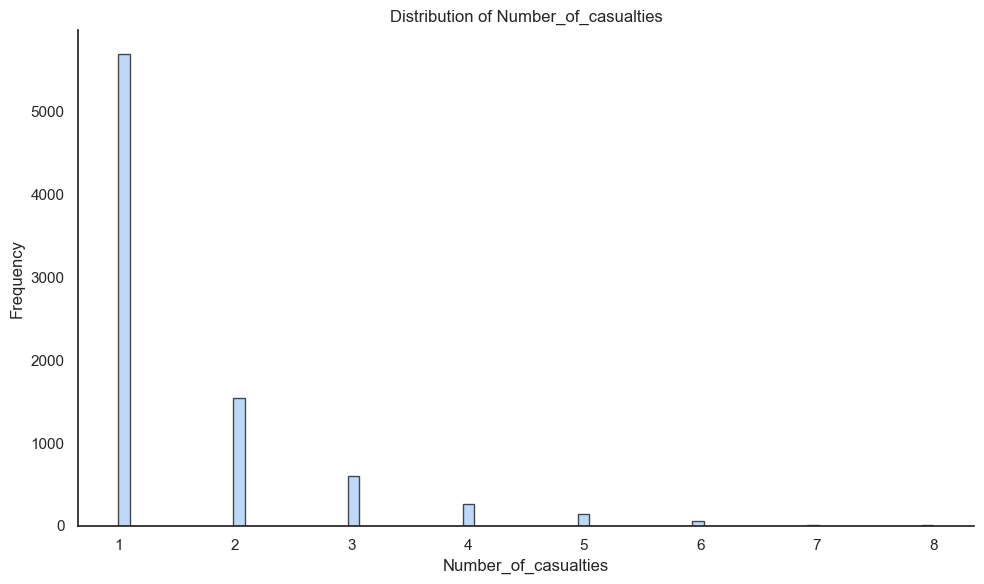

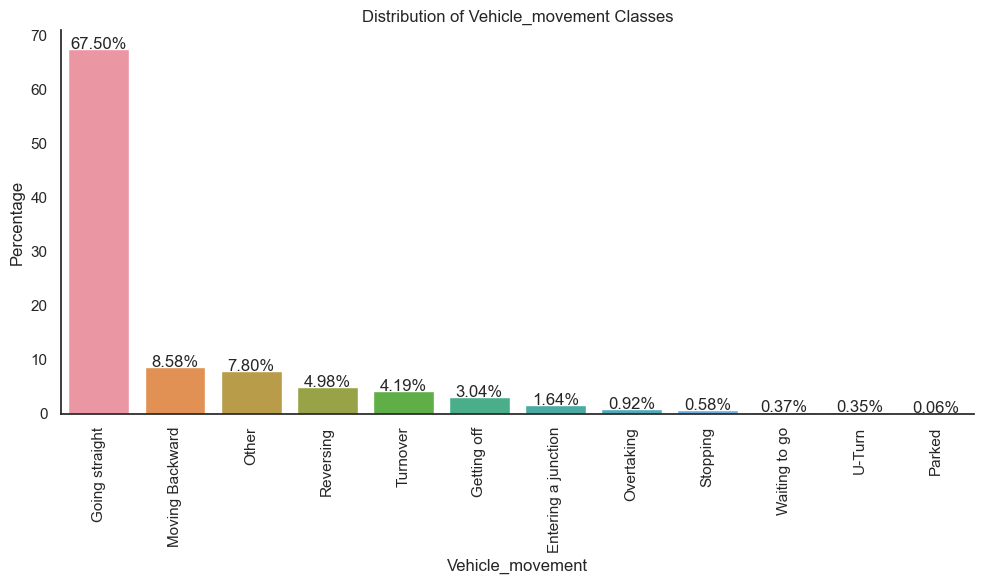

C:\Users\JACINTA\AppData\Local\Temp\ipykernel_29208\1168685268.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


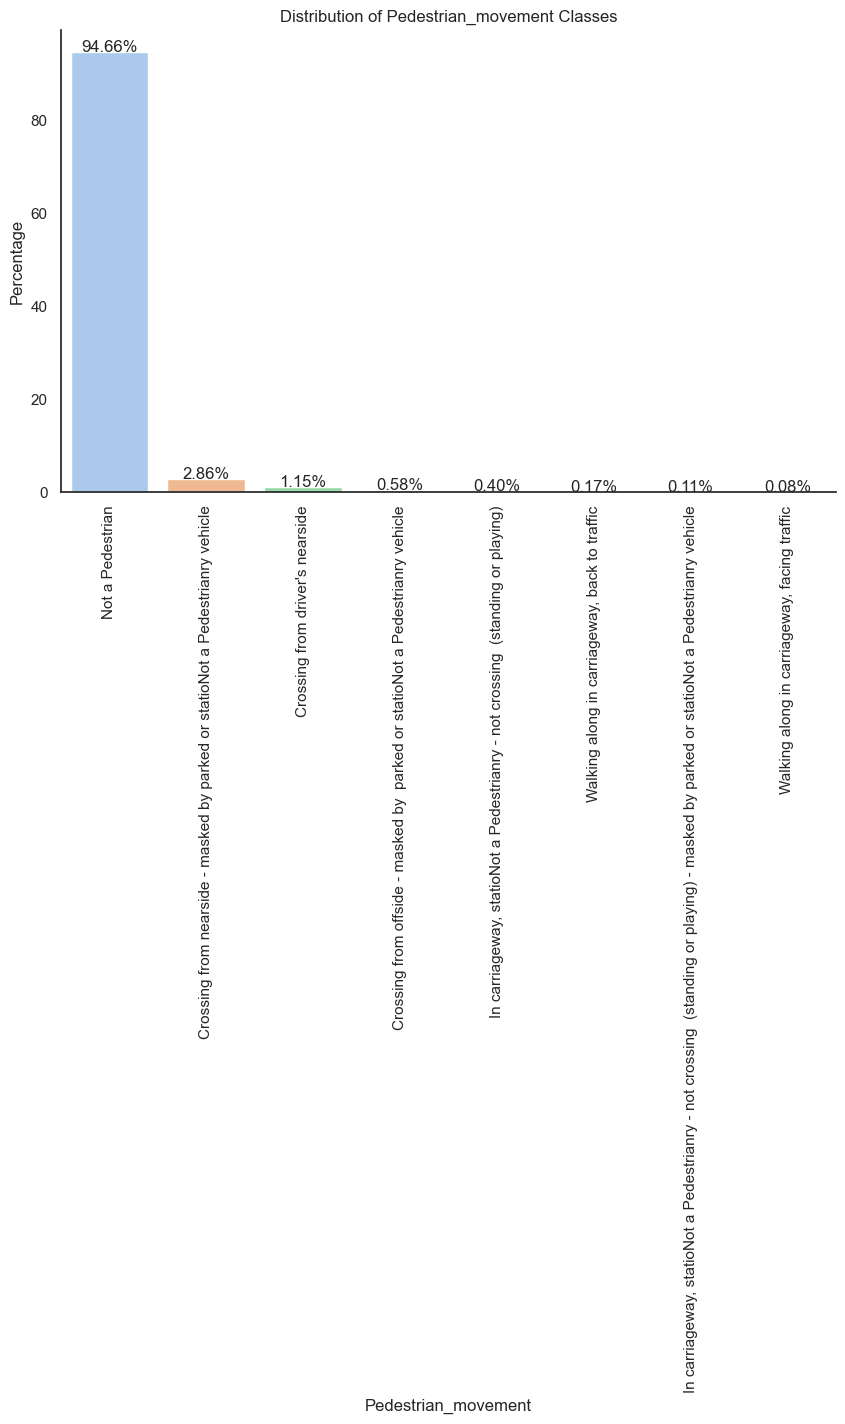

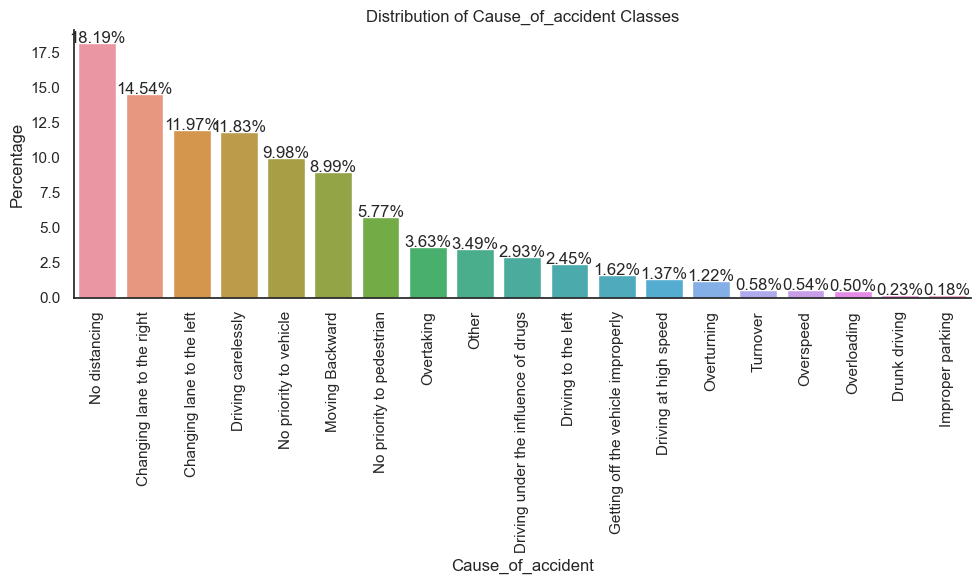

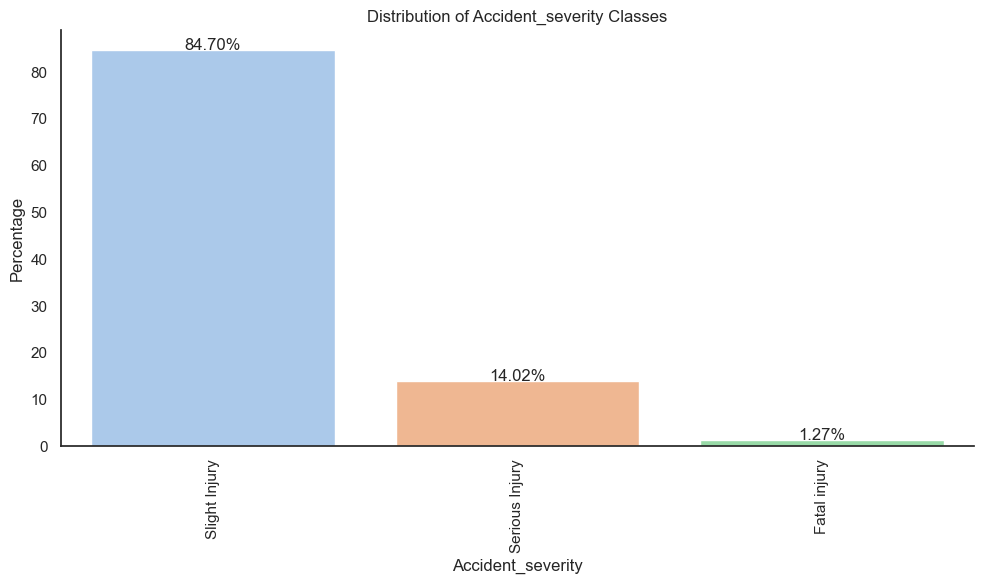

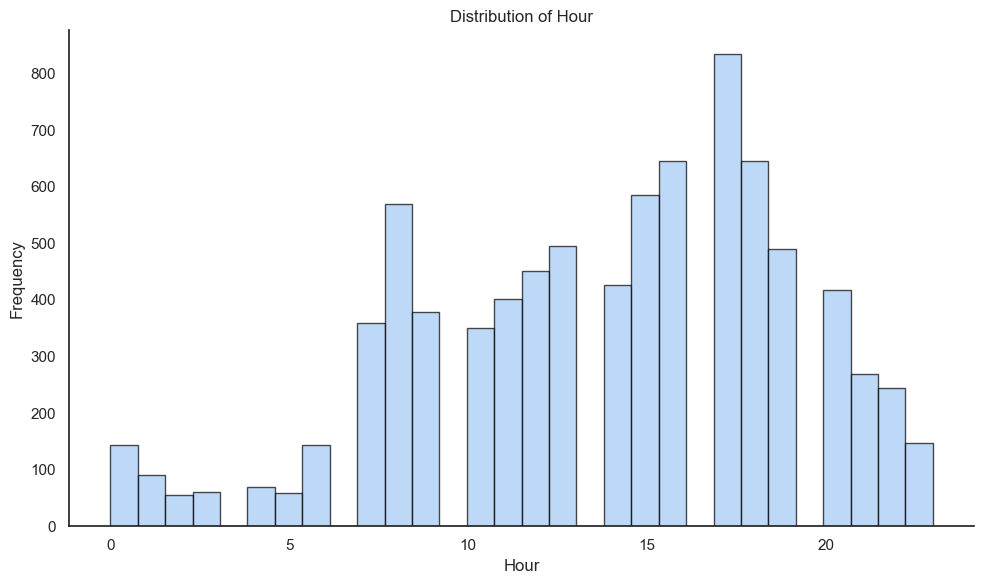

In [11]:
for col in df.columns: # loop thorough every column in the dataframe
    if df[col].dtype == 'object': # if the column is of object type
        plot_class_distribution(col, df)
    else:
        plot_discrete_numeric_distribution(col, df)

### Bivariate analysis

Necessary functions for bivariate analysis

In [12]:
# for categorical to categorical analysis
def perform_chi_squared_test(feature, target, df):
    """
    Perform a chi-squared test between a categorical feature and a target feature.

    Parameters:
    categorical_feature (str): Name of the categorical feature column in the DataFrame.
    target_feature (str): Name of the target feature column in the DataFrame.
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    float: The p-value from the chi-squared test.
    """
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df[target])
    
    # Perform the chi-squared test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    return p_value

# for numeric to categorical anlysis
def perform_anova_test(feature, target, df):
    """
    Perform an ANOVA test between a numeric feature and a target feature.

    Parameters:
    feature (str): Name of the numeric feature column in the DataFrame.
    targete (str): Name of the target feature column in the DataFrame.
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    float: The p-value from the ANOVA test.
    """
    # Group data by the target classes
    grouped_data = [df[feature][df[target] == class_] for class_ in df[target].unique()]
    
    # Perform ANOVA test
    f_statistic, p_value = f_oneway(*grouped_data)
    
    return p_value

# deciding between annova_test and chi-squared_test
def perform_statistical_test(feature, target, dataframe):
    """
    Decides on which statistical test to perform based on the data type of the feature.

    Parameters:
    feature (str): Name of the feature column in the DataFrame.
    target (str): Name of the target column in the DataFrame.
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    float: The p-value from the either statistical test(Chi-squared or ANOVA).
    """
    if pd.api.types.is_numeric_dtype(dataframe[feature]):
        return perform_anova_test(feature, target, dataframe)
    else:
        return perform_chi_squared_test(feature, target, dataframe)

# for visulization
def plot_treemap(feature, target, df):
    """
    Create a treemap to show the distribution of a feature variable within different classes of a target variable.

    Parameters:
    feature (str): Name of the feature column in the DataFrame.
    target (str): Name of the target column in the DataFrame.
    df (pd.DataFrame): The DataFrame containing the data.
    """
    # Get pvalue from relevant statistical test
    p_value = perform_statistical_test(feature, target, df)
    
    # Create a pivot table to calculate counts
    pivot_table = df.groupby([target, feature]).size().reset_index(name='Count')
    
    # Create treemap using Plotly
    fig = px.treemap(pivot_table, 
                     path=[target, feature], 
                     values='Count', 
                     color='Count',
                     color_continuous_scale='viridis',
                     title=f'Distribution of {feature} within {target} Classes (p-value: {p_value:.4f})')
    
    fig.show()

In [13]:
target = "Accident_severity"
for col in df.columns:
    if col == target:
        continue
    else:
        plot_treemap(col, target, df)

In [14]:
df.columns

Index(['Day_of_week', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity', 'Hour'],
      dtype='object')

### 2.b.2 Handling categorical data

In [15]:
#check for columns with categorical data.
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns.info()
#25 columns are  categorical.. we will use label encoder to transform them into integers

<class 'pandas.core.frame.DataFrame'>
Index: 8336 entries, 1 to 12315
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Day_of_week              8336 non-null   object
 1   Sex_of_driver            8336 non-null   object
 2   Educational_level        8336 non-null   object
 3   Vehicle_driver_relation  8336 non-null   object
 4   Driving_experience       8336 non-null   object
 5   Type_of_vehicle          8336 non-null   object
 6   Owner_of_vehicle         8336 non-null   object
 7   Area_accident_occured    8336 non-null   object
 8   Lanes_or_Medians         8336 non-null   object
 9   Road_allignment          8336 non-null   object
 10  Road_surface_type        8336 non-null   object
 11  Road_surface_conditions  8336 non-null   object
 12  Light_conditions         8336 non-null   object
 13  Weather_conditions       8336 non-null   object
 14  Type_of_collision        8336 non-null   obj

#### Solution :

1. **Time Handling**: The code improves the handling of time data within the subset. It first converts the 'Time' column into a datetime format using the `pd.to_datetime()` function. Then, it further refines the 'Time' column by extracting only the hour component from the datetime data, transforming entries like "13:36:00" to just "13".

2. **Copy for Alterable Data**: To ensure that the original subset of the DataFrame remains unchanged for future use, a new subset named `encoded_df` is created as a copy of the original DataFrame `df`.

3. **Label Encoding**: The code applies label encoding to categorical columns within the `encoded_df` subset. However, it explicitly excludes one specified column ('Accident_severity') from this encoding process. This column is intended to remain categorical, representing the target variable.

4. **Loop and Transformation**: The code uses a loop to iterate through each column in the `encoded_df`. For each column, except the excluded one, a label encoder is applied using the `LabelEncoder()` class from scikit-learn. This converts categorical data into numerical labels, making it suitable for use by machine learning algorithms.


In [16]:
# ##handles date better by extracting the hour eg 13:36:00 to 13
# # df['Time'] = pd.to_datetime(df['Time'])
# # df['Time'] = df['Time'].dt.hour

# #Because we don't want to alter our subset for future use.. we will make an alterable copy 
# encoded_df=df.copy()

# #load label encoder
# label_encoder = LabelEncoder()
# #loop through all columns except the target column and apply encoder
# for column in encoded_df.columns:
# #    if column != exclude_column:
#     encoded_df[column] = label_encoder.fit_transform(encoded_df[column])

# #prints our new subset's information.
# encoded_df.info()

In [17]:
# for col in encoded_df.columns:
#     var = encoded_df[col].nunique()
#     print(f"{col} has {var} unique values")

In [18]:
from sklearn.preprocessing import OrdinalEncoder

# handles date better by extracting the hour e.g., 13:36:00 to 13
# df['Time'] = pd.to_datetime(df['Time'])
# df['Time'] = df['Time'].dt.hour

# Make an alterable copy of the DataFrame
encoded_df = df.copy()

# Load OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Iterate through columns and apply OrdinalEncoder
for column in encoded_df.columns:
   if encoded_df[column].dtype == 'object':
        #Encode only categorical columns
       encoded_df[column] = ordinal_encoder.fit_transform(encoded_df[[column]])

#Print the information of the new subset
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8336 entries, 1 to 12315
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Day_of_week                  8336 non-null   float64
 1   Sex_of_driver                8336 non-null   float64
 2   Educational_level            8336 non-null   float64
 3   Vehicle_driver_relation      8336 non-null   float64
 4   Driving_experience           8336 non-null   float64
 5   Type_of_vehicle              8336 non-null   float64
 6   Owner_of_vehicle             8336 non-null   float64
 7   Area_accident_occured        8336 non-null   float64
 8   Lanes_or_Medians             8336 non-null   float64
 9   Road_allignment              8336 non-null   float64
 10  Road_surface_type            8336 non-null   float64
 11  Road_surface_conditions      8336 non-null   float64
 12  Light_conditions             8336 non-null   float64
 13  Weather_conditions    

## 6. Modelling

### Creating a Baseline model
Creating a baseline model is essential for benchmarking the performance of more intricate machine learning models.<br> 
It provides a straightforward reference point to evaluate the effectiveness of our advanced approaches.<br> 
By contrasting against this baseline, we can determine whether the complexity of our models genuinely yields improved results,<br> 
guiding our development efforts effectively.

In [19]:
target = "Accident_severity"
X = df.drop(columns=target)
y = df[target]

def baselinemodel(X, y):
    """
    Baseline model that predicts the mode of y for all instances.

    Parameters:
    - X: Feature matrix of shape (n_samples, n_features).
    - y: Target vector of shape (n_samples,).

    Returns:
    - accuracy: Accuracy of the baseline model.
    """

    # Convert categorical labels to numerical labels
    label_encoder = LabelEncoder()
    y_numerical = label_encoder.fit_transform(y)

    # Predict the mode of y for all instances
    predicted_mode = mode(y_numerical)
    predicted_labels = [predicted_mode] * len(y_numerical)

    # Calculate accuracy
    accuracy = accuracy_score(y_numerical, predicted_labels)

    return accuracy

In [20]:
base_accuracy = baselinemodel(X, y)
print(f"Baseline Model Accuracy: {base_accuracy}")

Baseline Model Accuracy: 0.8470489443378119


### Decision Tree Model
Decision trees are used to classify or estimate continuous values by partitioning the sample space as efficiently as possible into sets with similar data points until you get to (or close to) a homogenous set and can reasonably predict the value for new data points.

In [21]:
# Decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, roc_curve, auc
target = "Accident_severity"
X = encoded_df.drop(columns='Accident_severity')
y = encoded_df['Accident_severity']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train a DT classifier
classifier = DecisionTreeClassifier(criterion='entropy')  
classifier.fit(X_train, y_train)

# Make predictions for test data
y_pred = classifier.predict(X_test)

# Calculate accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))


Accuracy is :77.27817745803357


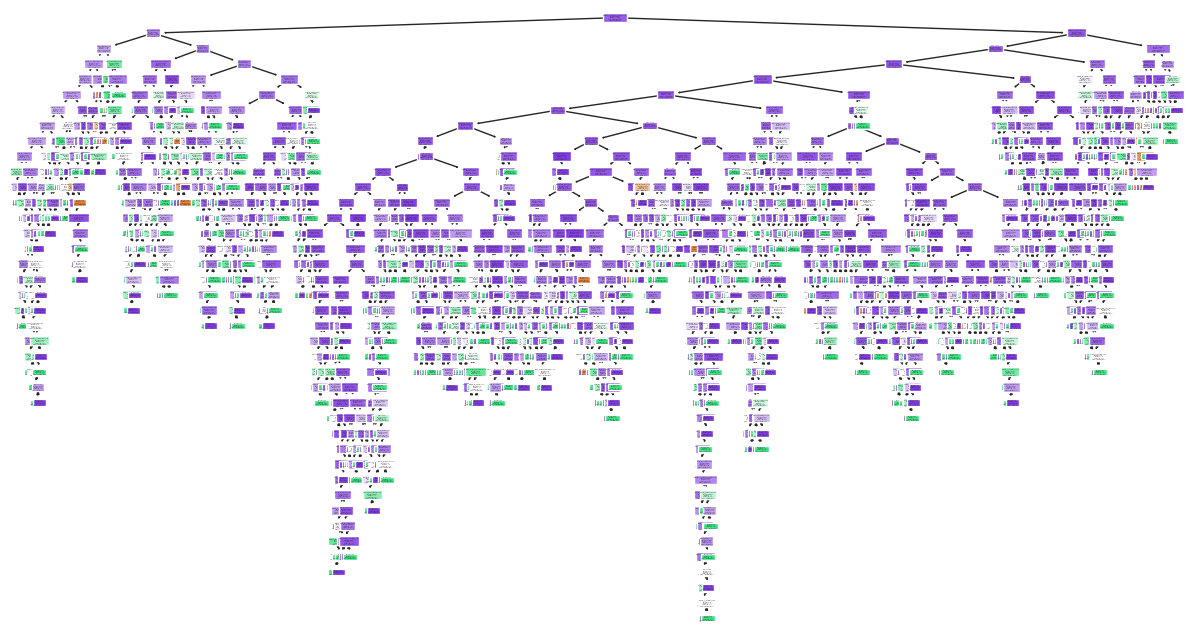

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

class_names = df["Accident_severity"].unique().tolist()
feature_names = X.columns.tolist()  # Convert DataFrame index to a list

plt.figure(figsize=(15, 8))
plot_tree(classifier, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [4]
}

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Use grid search to find the optimal estimate and parameters.
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions on the test data using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate the accuracy of the tuned model
accuracy = accuracy_score(y_test, y_pred)
print("Tuned Model Accuracy:", accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Tuned Model Accuracy: 0.7667865707434053
